<a href="https://colab.research.google.com/github/biggymart/colab/blob/main/icdar_mlt_kor_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ICDAR EDA를 해보자

**Part1. 이미지에 대한 기본적인 정보**

일단 이미지의 개수, 너비, 높이, 크기 알아보자

In [4]:
# 필요한 라이브러리 임포트
from tqdm import tqdm
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import numpy as np
import matplotlib.patches as patches
import warnings
warnings.filterwarnings("ignore")

**image_detail** 함수 정의

하는 기능: 

- files: (list); 이미지 파일 경로
- width: (list); 이미지 너비
- height: (list); 이미지 높이
- size: (list); 이미지 파일 크기 (단위: kbyte)

In [3]:
IMG_PATH = '/content/drive/MyDrive/ICDAR2019_Korean/korean_img'

def image_detail(img_path):
  '''
  root: os.walk()에 주어지는 첫번째 인자, 즉 base 경로
  dirs: root 아래에 있는 폴더 개수
  file: root 폴더에 존재하는 파일들
  '''
  files = []
  width = []
  height = []
  size = []
  for root, dirs, file in tqdm(os.walk(img_path, topdown=True)):
    for i in file:
      each_img_path = root + os.sep + i
      files.append(each_img_path)

      image = cv2.imread(each_img_path, cv2.COLOR_BGR2RGB)
      size.append(int(os.path.getsize(each_img_path)/1024)) # image file size in kilobytes (1024 bytes = 1 kbyte)
      w, h, _ = image.shape
      width.append(w)
      height.append(h)
  return files, width, height, size

icdar_images, icdar_width, icdar_height, icdar_size = image_detail(IMG_PATH)
print(f"len(icdar_images) == {len(icdar_images)}")


0it [00:00, ?it/s]
1it [04:31, 271.93s/it]

len(icdar_images) == 1000


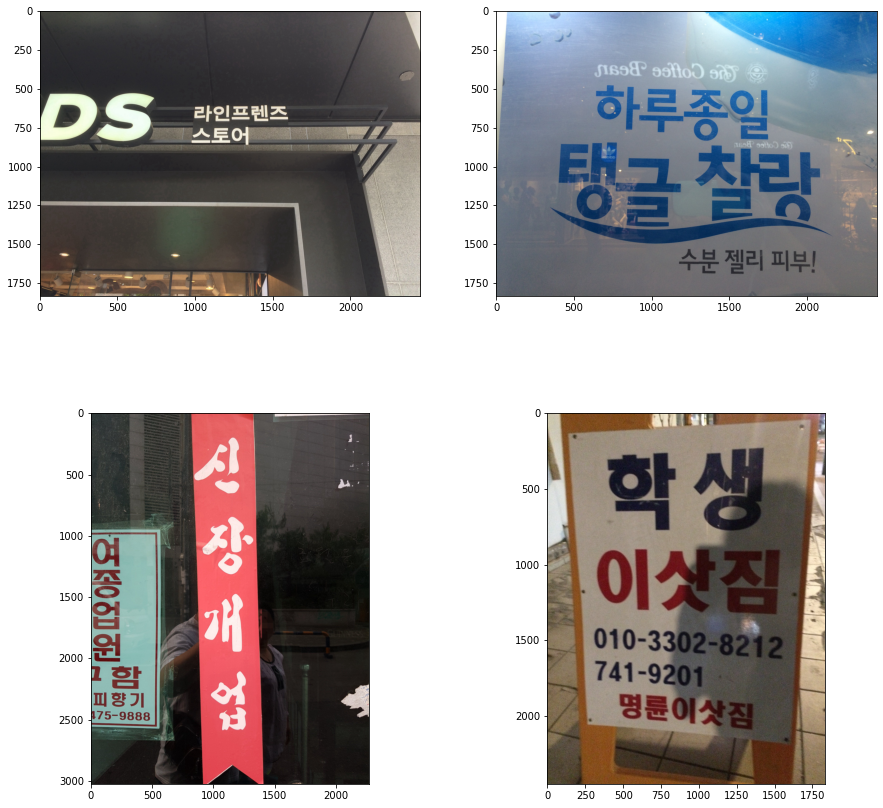

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

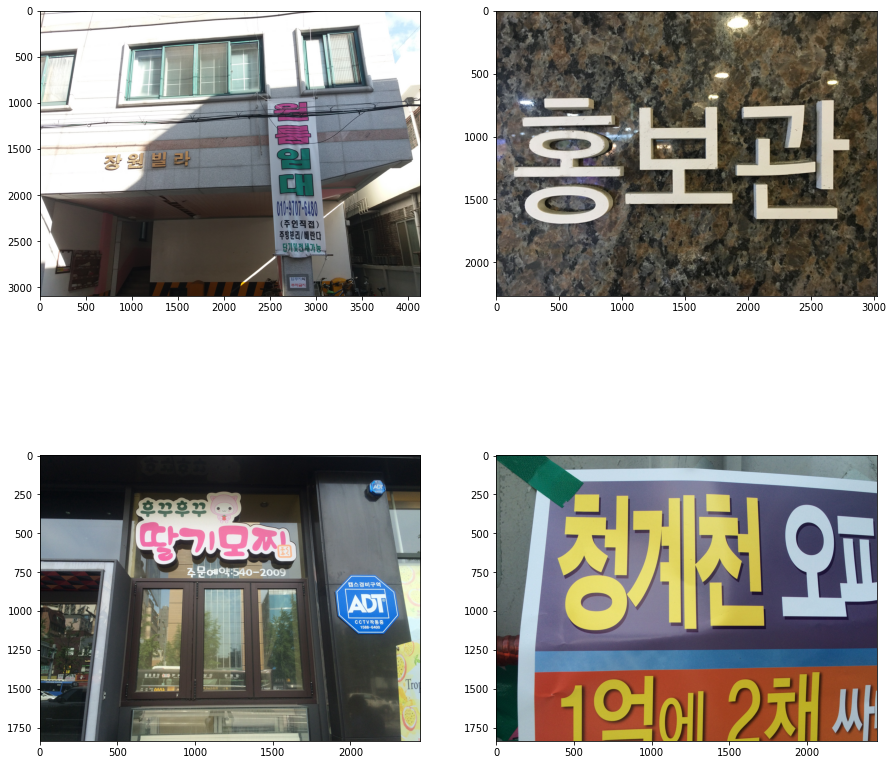

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [9]:
# 2 by 2 격자로 된 이미지 시각화하는 함수
def show_images(images):
    f, ax = plt.subplots(2, 2, figsize=(15, 15))
    ax = ax.flatten()

    for idx in range(4):
        # Read the image from given path and plot
        image = cv2.imread(images[idx], cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10,10))
        ax[idx].imshow(image)

# 1. 랜덤하게 뽑아와서 그리는 방식
random_images = random.sample(icdar_images, 16)
show_images(random_images[:4])

# 2. 순서대로 4장만 가져오는 방식
show_images(icdar_images[:4])

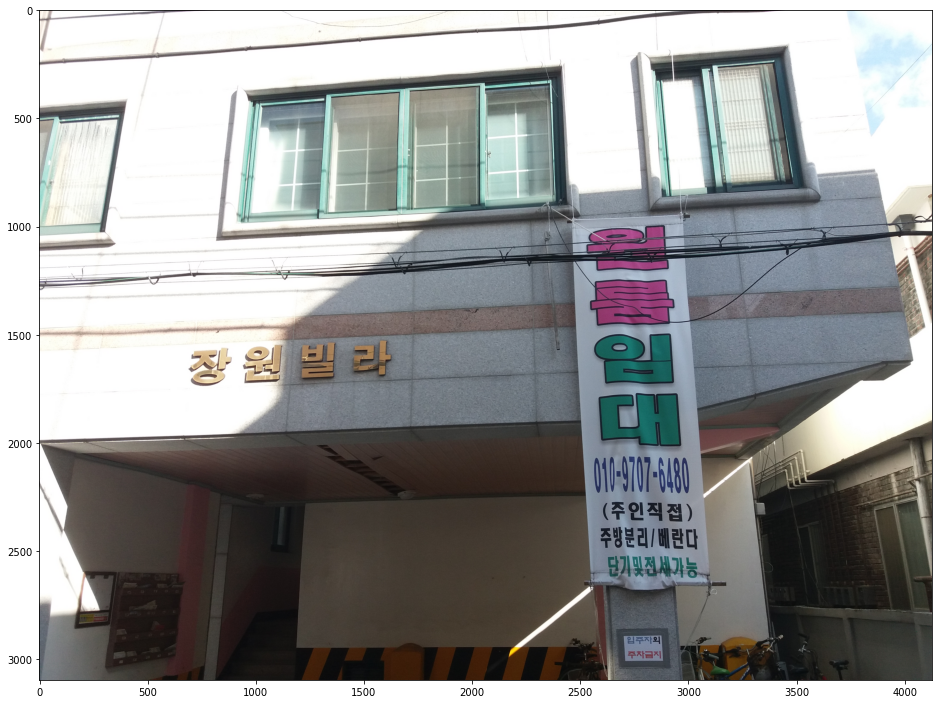

In [10]:
# 이미지 한 장 시각화
plt.figure(figsize=(16, 16))
image = cv2.imread(icdar_images[0], cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [11]:
# 리스트화하고 컴팩트하게 csv로 만들기
icdar_lst = [icdar_width, icdar_height, icdar_size]
icdar_data = pd.DataFrame(icdar_lst, index=['width', 'height', 'size']).T
icdar_data.to_csv('img_data.csv')

# 이미지 몇 개 있는지, csv로 만든 거 shape 확인
print()
print(f"length of icdar_images: {len(icdar_images)}")
print(icdar_data.shape)


length of icdar_images: 1000
(1000, 3)


In [12]:
icdar_data.head()

,width,height,size
0,3096,4128,3218
1,2268,3024,1966
2,1836,2448,1047
3,1836,2448,950
4,1836,2448,1047


In [13]:
icdar_data.tail()

,width,height,size
995,1080,1440,379
996,1836,2448,891
997,2268,3024,1123
998,2448,1836,1555
999,2592,3888,1295


In [14]:
# width, height, size 를 키로 주어 각각 확인해봐도 되고
# icdar_data['height'].describe()

# 한번에 통째로 확인할 수도 있다
icdar_data.describe()

,width,height,size
count,1000.000000,1000.000000,1000.000000
mean,2169.613000,2266.871000,1072.301000
std,514.379231,646.202416,613.756812
min,1080.000000,1080.000000,148.000000
25%,1836.000000,1836.000000,740.750000
50%,2268.000000,2328.000000,944.000000
75%,2448.000000,2448.000000,1199.500000
max,4128.000000,4128.000000,5914.000000


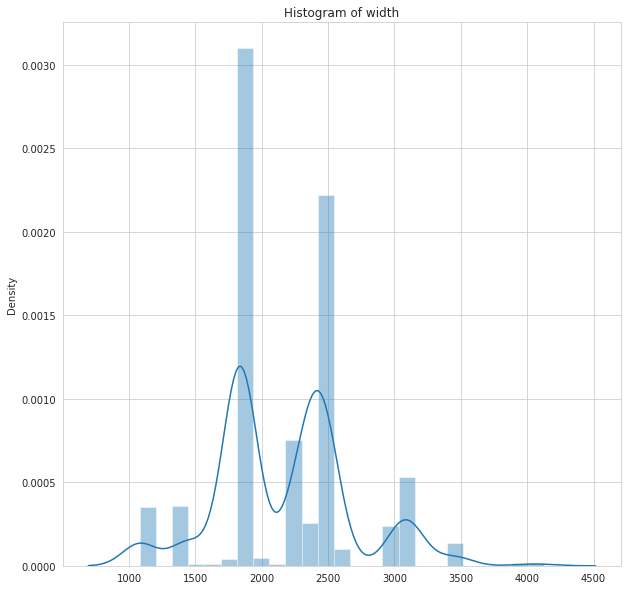

In [15]:
#Probability Density Function for image width
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(icdar_data['width'].values)
plt.title("Histogram of width")
plt.ylabel("Density")
plt.show()

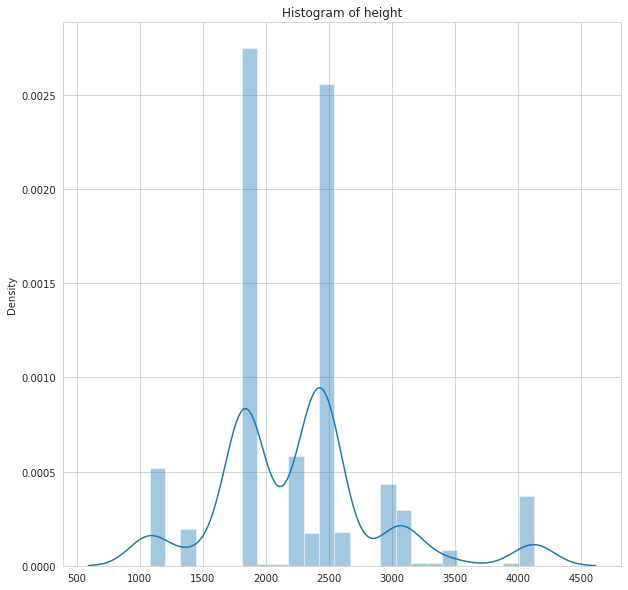

In [16]:
#Probability Density Function for image height
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(icdar_data['height'].values)
plt.title("Histogram of height")
plt.ylabel("Density")
plt.show()

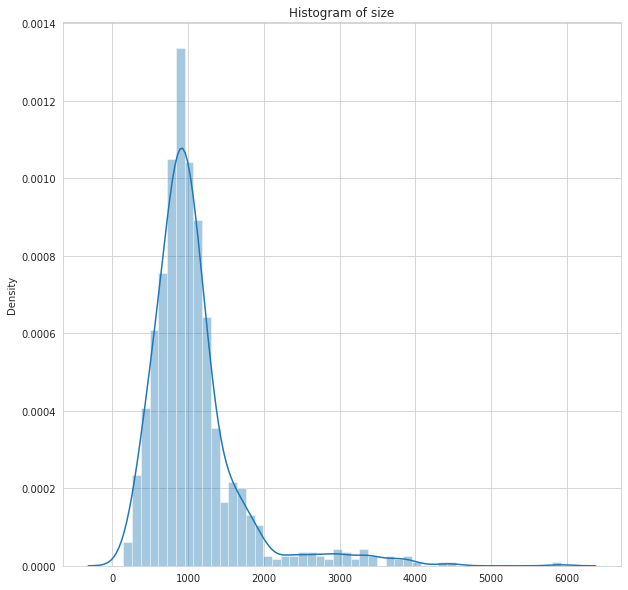

In [17]:
#Probability Density Function for image size
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(icdar_data['size'].values)
plt.title("Histogram of size")
plt.ylabel("Density")
plt.show()

위와 같은 EDA의 결과로 우리는 다음과 같은 사실을 알 수 있다:

1. 이미지의 크기 및 비율은 일관적이지 않다. 하지만 주로 1836,	2448 값이 자주 보였다.

2. 촬영 각도, 글자 크기, 비율, 방향 등 여러 변수가 존재한다. 하지만 모두 document text가 아닌 natural scene text였다.

3. 이미지 파일의 크기는 대부분 대략 1000kb 정도로, 상당히 고해상도이다.

**Part2. 바운딩 박스를 이미지 위에 시각화하기**

이미지에 대한 감이 좀 생겼으니, 이제 이미지 위에 바운딩 박스를 얹어보자.

가장 먼저, `image_detail()` 함수와 비슷한 `gt_detail` 함수를 만들어보자.

In [18]:
# 데이터셋의 모든 gt에 대한 경로를 리스트로 반환한다
GT_PATH = '/content/drive/MyDrive/ICDAR2019_Korean/annotation'

def gt_detail(gt_path):
  '''
  root: os.walk()에 주어지는 첫번째 인자, 즉 base 경로
  dirs: root 아래에 있는 폴더 개수
  file: root 폴더에 존재하는 파일들
  '''
  files = []
  for root, dirs, file in tqdm(os.walk(gt_path, topdown=True)):
    for i in file:
      each_gt_path = root + os.sep + i
      files.append(each_gt_path)
  return files

icdar_gts = gt_detail(GT_PATH)
print()
print(f"len(icdar_gts) == {len(icdar_gts)}")


0it [00:00, ?it/s]
1it [00:05,  5.53s/it]


len(icdar_gts) == 1000


In [19]:
val = [sorted(icdar_images),sorted(icdar_gts)]
icdar_kor = pd.DataFrame(val, index=['imname', 'ground_truth']).T

# icdar_kor는 base directory를 포함하기 때문에 너무 길어서 보기 더럽다
# 간결하게 만들어보자. just for visualization.
concise_table = icdar_kor.copy()
concise_table['imname'] = concise_table.imname.apply(lambda x: pd.Series(str(x).split('/')[-1]))
concise_table['ground_truth'] = concise_table.ground_truth.apply(lambda x: pd.Series(str(x).split('/')[-1]))

concise_table.head()

,imname,ground_truth
0,tr_img_05001.jpg,tr_img_05001.txt
1,tr_img_05002.jpg,tr_img_05002.txt
2,tr_img_05003.jpg,tr_img_05003.txt
3,tr_img_05004.jpg,tr_img_05004.txt
4,tr_img_05005.jpg,tr_img_05005.txt


Here is the format of the ground truth labels x1, y1, x2, y2, x3, y3, x4, y4, transcription

It contains the (x, y) coordinates of rectangle in clockwise manner starting from top left corner followed by corresponding text transcription (actual word in text).

The text transcription also contains "###", which means "Don't care" word. For now, we will ignore such words

In [20]:
# Adding ground truths to dataframe
def extract_gt(gt_path):
    """Extract ground truth coordinates from given text file."""
    with open(gt_path, 'r', encoding='utf-8-sig') as f:
        content = f.read().split('\n')
        # Removing empty lines
        content = [line for line in content if line]
        return np.array(
            list(map(lambda str: str.split(',')[:-1], content)), dtype='object'
        )

def extract_txt(gt_path):
    """Extract ground truth text/transcript from given text file."""
    with open(gt_path, 'r', encoding='utf-8-sig') as f:
        content = f.read().split('\n')
        # Removing empty lines
        content = [line for line in content if line]
        return np.array(
            list(map(lambda str: str.split(',')[-1], content)), dtype='object'
        )

# Extract ground truth bounding boxes
icdar_kor['ground_bboxes'] = icdar_kor['ground_truth'].map(extract_gt)

# Extract text for each ground truth
icdar_kor['ground_txt'] = icdar_kor['ground_truth'].map(extract_txt)
icdar_kor.head()

,imname,ground_truth,ground_bboxes,ground_txt
0,/content/drive/MyDrive/ICDAR2019_Korean/korean...,/content/drive/MyDrive/ICDAR2019_Korean/annota...,"[[733, 938, 1080, 996, 1104, 1129, 746, 1047, ...","[문을닉닫아주세요, 냉.난방중, 출입문, 출압문, ###, ###, ###, ###]"
1,/content/drive/MyDrive/ICDAR2019_Korean/korean...,/content/drive/MyDrive/ICDAR2019_Korean/annota...,"[[2, 1937, 321, 1947, 308, 2056, 2, 2043, Lati...","[6-0924, 서나, www.09clean.com', 셰속됩니다, 이사는, 하는,..."
2,/content/drive/MyDrive/ICDAR2019_Korean/korean...,/content/drive/MyDrive/ICDAR2019_Korean/annota...,"[[659, 771, 1200, 775, 1209, 931, 672, 922, Ko...","[엔티산업, 주식회사, ###, 환영합니다, ###, 주식회사, 엔티산업, 약속드립..."
3,/content/drive/MyDrive/ICDAR2019_Korean/korean...,/content/drive/MyDrive/ICDAR2019_Korean/annota...,"[[74, 886, 1051, 864, 1063, 1208, 117, 1224, K...","[파스타, 샐러드, +, Or, 피자, 음료, AM, 11:00~PM, 02:30]"
4,/content/drive/MyDrive/ICDAR2019_Korean/korean...,/content/drive/MyDrive/ICDAR2019_Korean/annota...,"[[1089, 349, 1566, 329, 1570, 602, 1103, 622, ...","[7-1, 청량리, 방면]"


**본. 격. 이미지 위에 바운딩 박스 올려서 시각화하기**

In [21]:
def plot_bb_icdar(images, bboxes ,titles , color='red'):
    """
    Plots bounding boxes over given image.
    """
    f, ax = plt.subplots(2, 2, figsize=(16, 10))
    ax = ax.flatten()

    for idx in range(4):
        # Read the image from given path and plot
        image = cv2.imread(images[idx], cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for bbox_idx in range(bboxes[idx].shape[0]):
            # Define rectangle vertices
            vertices = [
                (bboxes[idx][bbox_idx][0], bboxes[idx][bbox_idx][1]),
                (bboxes[idx][bbox_idx][2], bboxes[idx][bbox_idx][3]),
                (bboxes[idx][bbox_idx][4], bboxes[idx][bbox_idx][5]),
                (bboxes[idx][bbox_idx][6], bboxes[idx][bbox_idx][7]),
            ]
            if list(map(str.strip, titles[idx]))[bbox_idx] != '###':
                # Draw the affine rectangle (polygon)
                bbox = patches.Polygon(
                    vertices,
                    linewidth=2,
                    edgecolor=color,
                    facecolor='none',
                )
                ax[idx].add_patch(bbox)
        ax[idx].title.set_text(", ".join([t for t in list(map(str.strip, titles[idx])) if t!='###']))
        ax[idx].imshow(image)

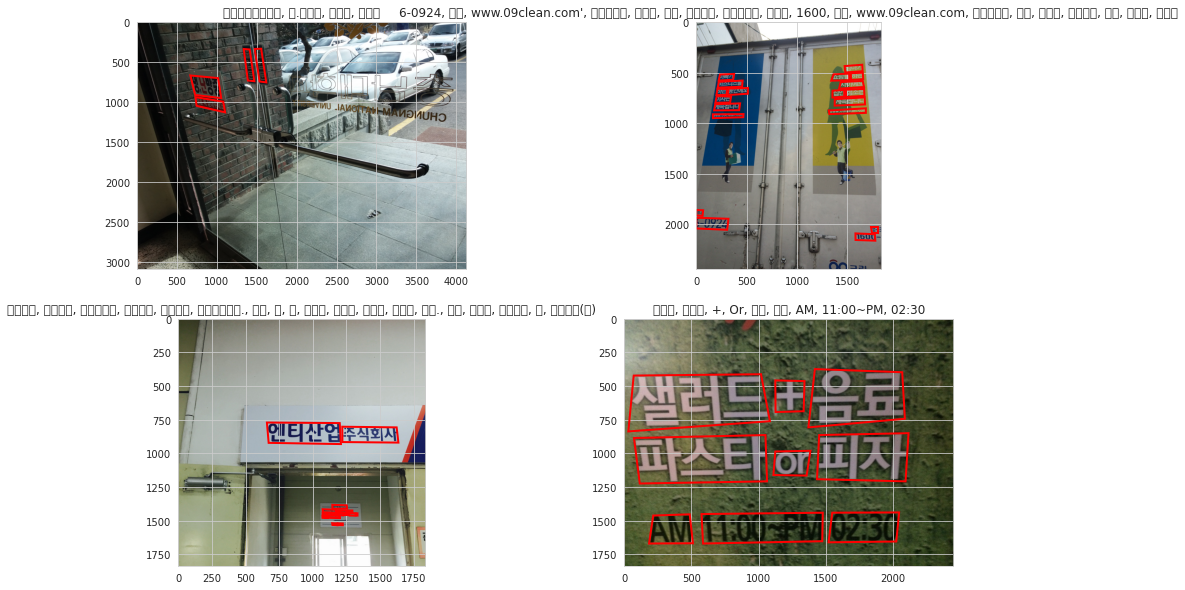

In [22]:
imname=icdar_kor['imname'].values
gt_bb=icdar_kor['ground_bboxes'].values
titles=icdar_kor['ground_txt'].values
plot_bb_icdar(imname[:4],gt_bb[:4],titles[:4])

In [23]:
bbox=[x.shape[0] for x in icdar_kor['ground_bboxes']]

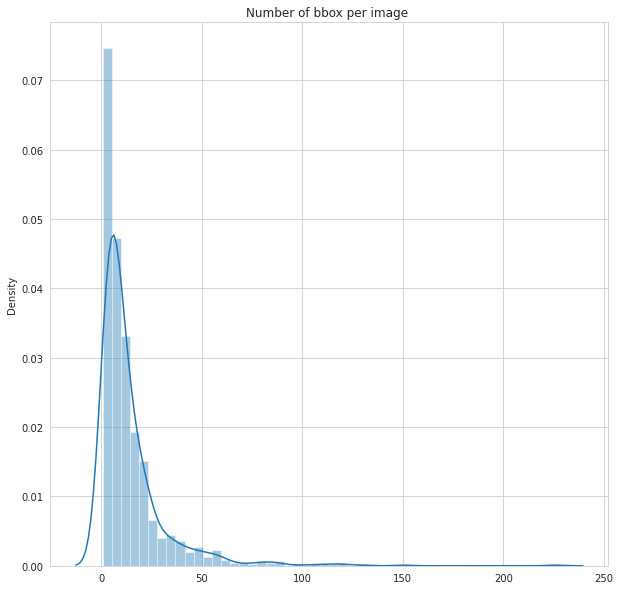

In [24]:
# 바운딩 박스 분포
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(bbox)
plt.title("Number of bbox per image ")
plt.ylabel("Density")
plt.show()

이로부터 알 수 있는 사실은 다음과 같다:

어쩌고 저쩌고

In [25]:
def distance_between_points(p1, p2):
    p1, p2 = np.array(p1), np.array(p2)
    return np.sqrt(np.sum((p1-p2)**2))

In [26]:
bbox_w, bbox_h, bbox_size = [], [], []

for idx in tqdm(range(len(icdar_kor['ground_bboxes']))):
    for bbox_idx in range(icdar_kor['ground_bboxes'][idx].shape[0]):
        top_left = (icdar_kor['ground_bboxes'][idx][bbox_idx][0], icdar_kor['ground_bboxes'][idx][bbox_idx][1])
        top_right = (icdar_kor['ground_bboxes'][idx][bbox_idx][2], icdar_kor['ground_bboxes'][idx][bbox_idx][3])
        bottom_left = (icdar_kor['ground_bboxes'][idx][bbox_idx][6], icdar_kor['ground_bboxes'][idx][bbox_idx][7])

        top_left = tuple(map(int, top_left))
        top_right = tuple(map(int, top_right))
        bottom_left = tuple(map(int, bottom_left))

        w = distance_between_points(top_left, top_right)
        h = distance_between_points(top_left, bottom_left)
        
        bbox_w.append(w)
        bbox_h.append(h)
        bbox_size.append(w*h)


100%|██████████| 1000/1000 [00:01<00:00, 679.29it/s]


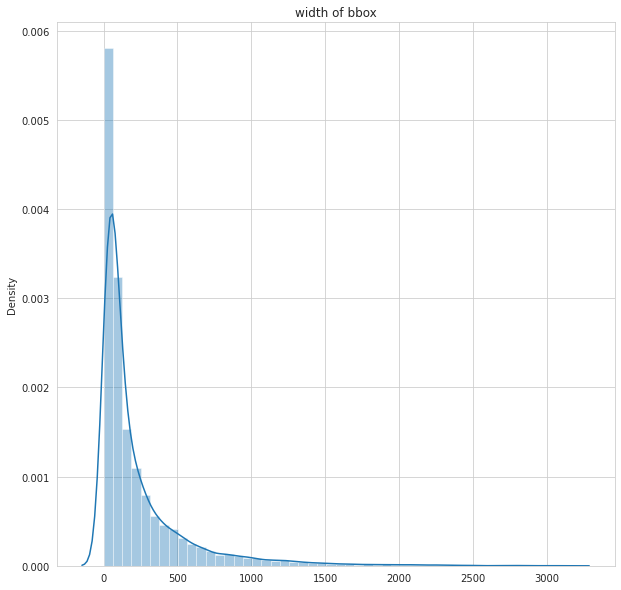

In [27]:
# 바운딩 박스 너비 분포
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(bbox_w)
plt.title("width of bbox")
plt.ylabel("Density")
plt.show()

이로부터 알 수 있는 사실은 다음과 같다:

어쩌고 저쩌고

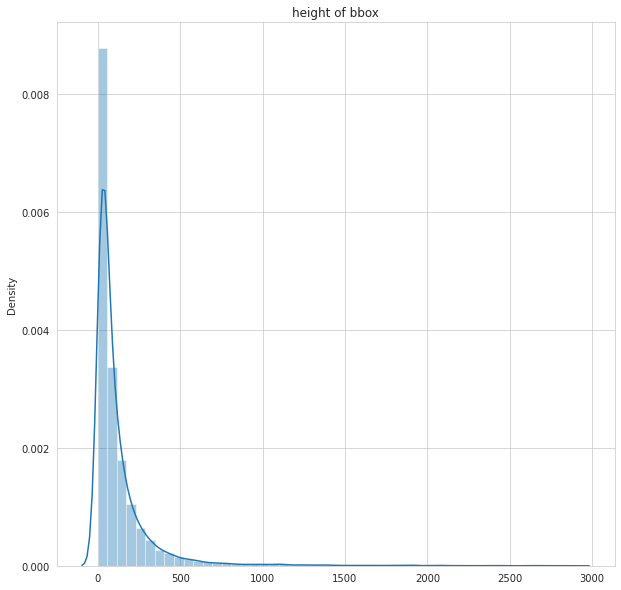

In [28]:
# 바운딩 박스 높이 분포
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(bbox_h)
plt.title("height of bbox")
plt.ylabel("Density")
plt.show()

이로부터 알 수 있는 사실은 다음과 같다:

어쩌고 저쩌고

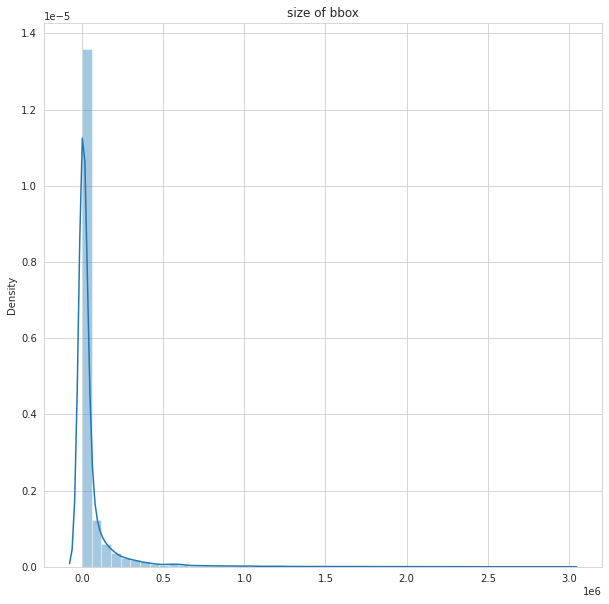

In [29]:
# 바운딩 박스 크기 분포
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(bbox_size)
plt.title("size of bbox")
plt.ylabel("Density")
plt.show()

이로부터 알 수 있는 사실은 다음과 같다:

어쩌고 저쩌고